<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/6_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Digital
### October 25th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 04/10/2021




## Configuration

### Clone the GIT

In [ ]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
Cloning into 'Electronics-2021-UNITO'...
remote: Enumerating objects: 2242, done.
remote: Counting objects: 100% (2242/2242), done.
remote: Compressing objects: 100% (1642/1642), done.
remote: Total 2242 (delta 1233), reused 1258 (delta 571), pack-reused 0
Receiving objects: 100% (2242/2242), 91.79 MiB | 26.01 MiB/s, done.
Resolving deltas: 100% (1233/1233), done.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

### Importa moduli [no COLAB]

In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


### Importa moduli [COLAB]

In [2]:
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle #Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


### Funzioni per l'importazione file Tektronix

In [2]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

Digital

## Set Reset

5.1   5.1   3.6   3.5


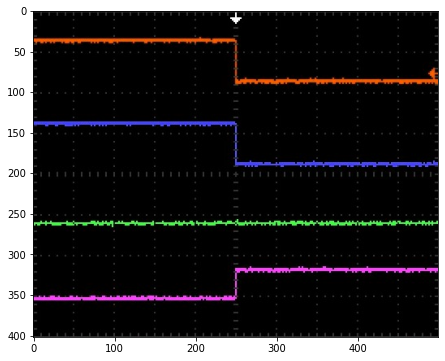

In [3]:
from scipy.stats import gaussian_kde
import cv2
img = cv2.imread(f'{DATADIR}/25-10-21/fronte1-RS-crop.JPG',1)
img = cv2.bitwise_not(img)

fig, ax = plt.subplots(figsize=(8, 6))

ax.imshow(img)
y1 = 301
y2 = 311
x1 = 99
x2 = 109
fs_t = 20*10**-3 #s

fs_V = 1 #V

S1 = 36
S2 = 87
b=101
R1 = S1+b
R2 = S2+b
Q1 = 321 #misurati su fronte1_rs
Q2 = 285 #misurati su fronte1_rs
Q_1 = 319
Q_2 = 354
pp1 = abs(S1-S2)*fs_V/abs(x2-x1)
pp2 = abs(R1-R2)*fs_V/abs(x2-x1)
pp3 = abs(Q1-Q2)*fs_V/abs(x2-x1)
pp4 = abs(Q_1-Q_2)*fs_V/abs(x2-x1)
print(pp1,' ',pp2,' ',pp3,' ',pp4)


In [10]:
time_div = 4 #s


timebase = np.linspace(time_div * -5., time_div * 5., 50000)

def plotLogicLevel_noclk(ch1, ch1_name, ch2, ch2_name, ch3, ch3_name, ch4, ch4_name, timebase, time_div ):
   
    fig, ax  = plt.subplots(figsize=(8,5))
    ax.plot(timebase, ch4 -3, color="black", linewidth=2.5)
    ax.plot(timebase, ch3 -1, color="black", linewidth=2.5)
    ax.plot(timebase, ch2 +1, color="red", linewidth=2.5)
    ax.plot(timebase, ch1 +3, color="red", linewidth=2.5)
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Base dei tempi (s)",fontsize=14)
    plt.xlim([time_div * -5., time_div * 5.])
    plt.ylim([-3.5,  5])
    plt.title("Livelli logici",fontsize=15)

    #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
    #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
    ax.fill_between(timebase, -2, -3, color="lightgray")
    ax.text(-0.47,-2 + 0.3, ch4_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, -1, +0, color="lightgray")
    ax.text(-0.47, + 0.3, ch3_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +1, +2, color="lightgray")
    ax.text(-0.47, +2 + 0.3, ch2_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.fill_between(timebase, +3, +4, color="lightgray")
    ax.text(-0.47, +4 + 0.3, ch1_name, fontsize=13, bbox=dict(facecolor='white', alpha=1))
    ax.grid()
    ax.text(0.945*time_div*5,-3, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,-2, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))  
    ax.text(0.945*time_div*5,-1, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,0, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,1, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,2, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,3, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    ax.text(0.945*time_div*5,4, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))



No handles with labels found to put in legend.


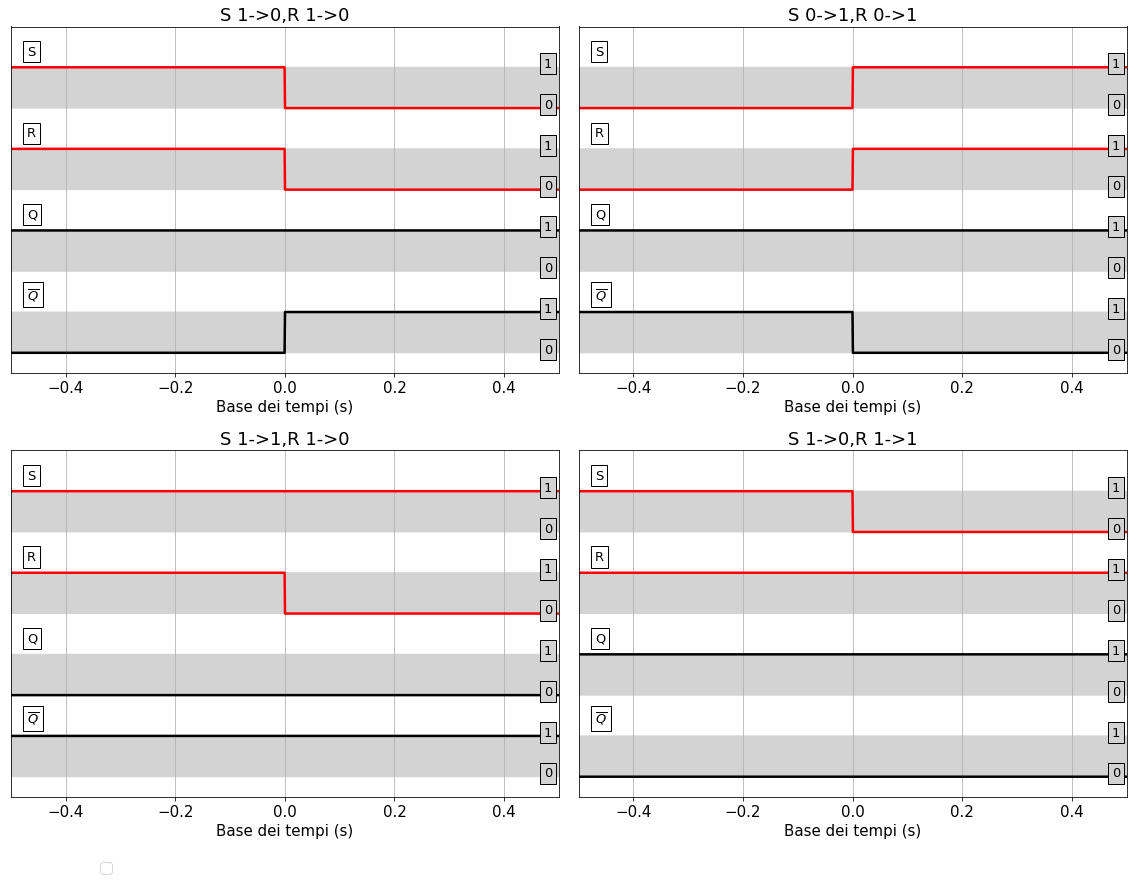

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,12))
#fig, ax = plt.subplots()
time_div = 0.1
ch1 = [np.heaviside(-timebase , 1),np.heaviside(timebase , 1),np.heaviside(timebase-timebase[0] , 1),np.heaviside(-timebase , 1)]
ch2 = [np.heaviside(-timebase , 1),np.heaviside(timebase , 1),np.heaviside(-timebase , 1),np.heaviside(timebase-timebase[0] , 1)]
ch3 = [np.heaviside(timebase-timebase[0], 1),np.heaviside(timebase-timebase[0], 1),np.heaviside(timebase+timebase[0], 1),np.heaviside(timebase-timebase[0], 1)]
ch4 = [np.heaviside(timebase, 1),np.heaviside(-timebase, 1),np.heaviside(timebase-timebase[0], 1),np.heaviside(timebase+timebase[0], 1)]


c=0

for i in range(0,2):
    for j in range(0,2):
        ax[i][j].plot(timebase, ch4[i+j+c] -3, color="black", linewidth=2.5)
        ax[i][j].plot(timebase, ch3[i+j+c] -1, color="black", linewidth=2.5)
        ax[i][j].plot(timebase, ch2[i+j+c] +1, color="red", linewidth=2.5)
        ax[i][j].plot(timebase, ch1[i+j+c] +3, color="red", linewidth=2.5)
        ax[i][j].get_yaxis().set_visible(False)
        ax[i][j].set(xlabel="Base dei tempi (s)",xlim=[time_div * -5., time_div * 5.],ylim=[-3.5,  5])
        #plt.title("Livelli logici",fontsize=15)

        #ax.hlines(-2, -0.6, 0.6, color = "black", linestyle="--")
        #ax.hlines(-3, -0.6, 0.6, color = "black", linestyle="--")
        ax[i][j].fill_between(timebase, -2, -3, color="lightgray")
        ax[i][j].text(-0.47,-2 + 0.3, "$\overline{Q}$", fontsize=13, bbox=dict(facecolor='white', alpha=1))
        ax[i][j].fill_between(timebase, -1, +0, color="lightgray")
        ax[i][j].text(-0.47, + 0.3, 'Q', fontsize=13, bbox=dict(facecolor='white', alpha=1))
        ax[i][j].fill_between(timebase, +1, +2, color="lightgray")
        ax[i][j].text(-0.47, +2 + 0.3, 'R', fontsize=13, bbox=dict(facecolor='white', alpha=1))
        ax[i][j].fill_between(timebase, +3, +4, color="lightgray")
        ax[i][j].text(-0.47, +4 + 0.3, 'S', fontsize=13, bbox=dict(facecolor='white', alpha=1))
        ax[i][j].grid()
        ax[i][j].text(0.945*time_div*5,-3, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,-2, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))  
        ax[i][j].text(0.945*time_div*5,-1, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,0, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,1, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,2, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,3, "0", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
        ax[i][j].text(0.945*time_div*5,4, "1", fontsize=13, bbox=dict(facecolor='lightgray', alpha=1))
    c=c+1


plt.rc('font', size=15)
ax[0][0].set(title='S 1->0,R 1->0')
ax[0][1].set(title='S 0->1,R 0->1')
ax[1][0].set(title='S 1->1,R 1->0')
ax[1][1].set(title='S 1->0,R 1->1')    

    
    
    
fig.legend(loc = "upper center", bbox_to_anchor = (0.1, 0.))
fig.tight_layout()
plt.savefig(f"{OUTPUTDIR}/set-reset-table.pdf")

S/R (S 1->0,R 1->0)

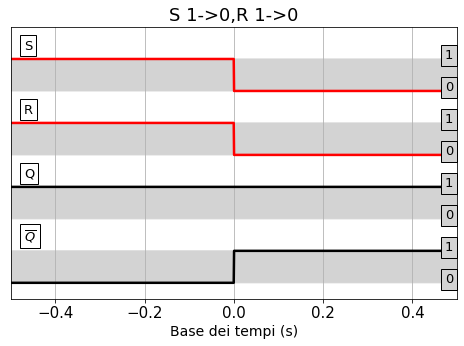

In [12]:
ch1 = np.heaviside(-timebase , 1)
ch2 = np.heaviside(-timebase , 1)
ch3 = np.heaviside(timebase-timebase[0], 1)
ch4 = np.heaviside(timebase, 1)


plotLogicLevel_noclk(ch1, "S", ch2, "R", ch3, "Q", ch4, "$\overline{Q}$", timebase,0.1) #aggiustare Q barrato
plt.title('S 1->0,R 1->0')
plt.savefig(f"{OUTPUTDIR}/set-reset-to-0_0.pdf")

S/R (S 0->1,R 0->1)

In [ ]:
ch1 = np.heaviside(timebase , 1)
ch2 = np.heaviside(timebase , 1)
ch3 = np.heaviside(timebase-timebase[0], 1)
ch4 = np.heaviside(-timebase, 1)


plotLogicLevel_noclk(ch1, "S", ch2, "R", ch3, "Q", ch4, "$\overline{Q}$", timebase,0.1) #aggiustare Q barrato
plt.title('S 0->1,R 0->1',fontsize=15)
plt.savefig(f"{OUTPUTDIR}/set-reset-to-1_1.pdf")

S/R (S 1->1,R 1->0)

In [ ]:
ch1 = np.heaviside(timebase-timebase[0] , 1)
ch2 = np.heaviside(-timebase , 1)
ch3 = np.heaviside(timebase+timebase[0], 1)
ch4 = np.heaviside(timebase-timebase[0], 1)


plotLogicLevel_noclk(ch1, "S", ch2, "R", ch3, "Q", ch4, '$\overline{Q}$', timebase,0.1) #aggiustare Q barrato
plt.title('S 1->1,R 1->0',fontsize=15)
plt.savefig(f"{OUTPUTDIR}/set-reset-to-1_0.pdf")

S/R (S 1->0,R 1->1)

In [ ]:
ch1 = np.heaviside(-timebase , 1)
ch2 = np.heaviside(timebase-timebase[0] , 1)
ch3 = np.heaviside(timebase-timebase[0], 1)
ch4 = np.heaviside(timebase+timebase[0], 1)


plotLogicLevel_noclk(ch1, "S", ch2, "R", ch3, "Q", ch4, "$\overline{Q}$", timebase,0.1) #aggiustare Q barrato
plt.title('S 1->0,R 1->1',fontsize=15)
plt.savefig(f"{OUTPUTDIR}/set-reset-to-0_1.pdf")

## Shift Register


## Commit changes

In [ ]:
def commit_changes(msg: str):
    %cd /content/Electronics-2021-UNITO/
    !git pull
    !git add .
    !git commit -m msg
    !git push
    
confirm = input("Do you want to commit changes?")

if(confirm in ['yes', 'y']):
    msg = input("commit message: ") 
    commit_msg_changes(msg)